In [37]:
import pandas as pd
import os
import slr_pkg.clean_load_data as cld
import slr_pkg.para as para
from pathlib import Path

# Get current working directory
bp = Path(os.getcwd())

# Set base data directory.
dp = bp / 'data'

# Set sample data directory.
edf_path = dp / 'geotracker_edf_results'
gama_path = dp / 'gama_results'

# Set location data directory.
geo_xy_path = dp / 'geotracker_xy'
gama_xy_path = dp / "gama_xy"

# Set results directory
results_path = bp / "results"

# Create path to mcl table.
mcl_path = dp / 'MCLs.xlsx'

In [38]:
# Ask for county to gather data for.
# areas = ['Ventura','SanDiego', 'Kern', 'Imperial','SantaBarbara', 'LosAngeles']
area = 'Ventura'

# List of contaminants.
chems = para.conts11

In [39]:
edf_files = edf_path.glob('**/*{}*.zip'.format(area))
gama_files = gama_path.glob('**/*{}*.zip'.format(area.lower()))

samples = cld.Sample_Data.full_dataset(edf_files, gama_files)

print(samples)
print("Unique Sample IDs (SIDs):" ,len(samples['SID'].unique()))

Loading Geotracker file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\geotracker_edf_results\VenturaEDF.zip 
Creating WID column... 
Loading GAMA file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\gama_results\gama_ddw_ventura_v2.zip 
Renaming GAMA columns... 
Loading GAMA file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\gama_results\gama_dpr_ventura_v2.zip 
Renaming GAMA columns... 
Loading GAMA file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\gama_results\gama_dwr_ventura_v2.zip 
Renaming GAMA columns... 
Loading GAMA file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\gama_results\gama_gama_usgs_ventura_v2.zip 
Renaming GAMA columns... 
Loading GAMA file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\gama_results\gama_usgs_nwis_ventura_v2.zip 
Renaming GAMA columns... 
Loading GAMA file: e:\work\projects\coast_slr\scripts\slr_ground_water_quality_\data\gama

In [40]:
import matplotlib.pyplot as plt

In [41]:
from collections import Counter
spec_samples = samples[samples['PARLABEL'].isin(chems)].copy()


In [42]:
spec_samples.to_csv(results_path / '{}_allsamples.csv'.format(area))

In [43]:
counter = Counter(spec_samples['PARLABEL'])

In [45]:
counter.most_common()

[('BZ', 97274),
 ('BZME', 97233),
 ('EBZ', 97119),
 ('MTBE', 95053),
 ('XYLENES', 58830),
 ('TCE', 32311),
 ('EDB', 28641),
 ('PCE', 27614),
 ('TCPR123', 24619),
 ('PB', 15437),
 ('CD', 8103)]

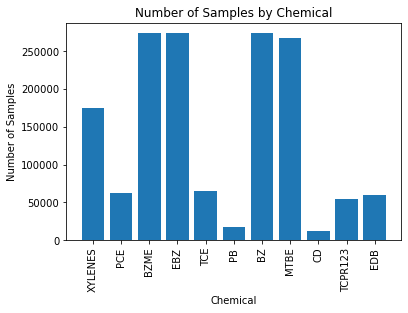

Text(0, 0.5, 'Number of Samples')

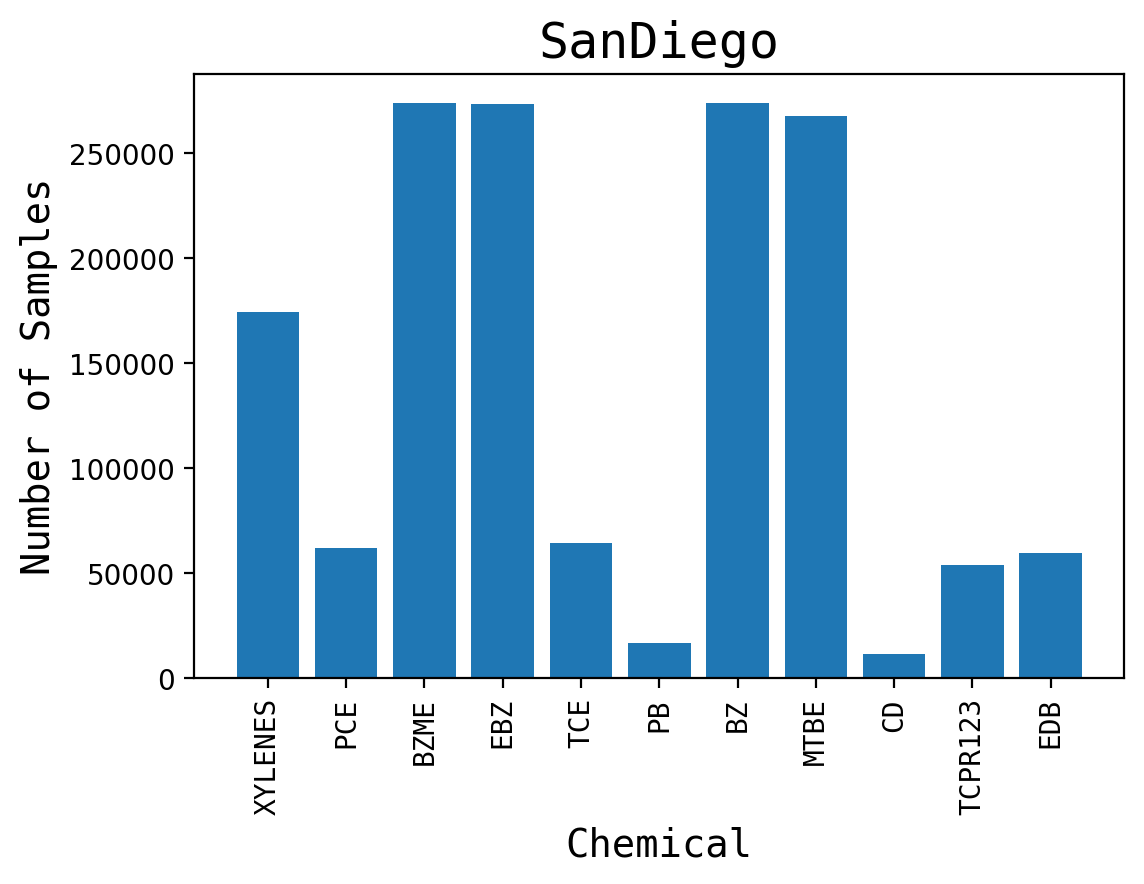

In [34]:
x = list(counter.keys())
y = list(counter.values())
plt.bar(x, y)
plt.title('Number of Samples by Chemical')
plt.xlabel('Chemical')
plt.ylabel('Number of Samples')
plt.xticks(rotation=90)
plt.show()
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111)
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=90, fontdict={'fontname': 'monospace'})

ax.set_title(area, fontdict={'fontsize': '18',  'family': 'monospace'})
ax.set_xlabel('Chemical', fontdict={'fontsize': '14',  'family': 'monospace'})
ax.set_ylabel('Number of Samples', fontdict={'fontsize': '14',  'family': 'monospace'})

In [ ]:

ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x, y)
ax.set_xticks()
ax.set_xticklabels(x, rotation=90)
ax.set_xlabel('PARLABEL')